# The Law of Large Numbers (LLN)

🧑🏻‍🏫 What is the LLN ? According to [Wikipedia](https://en.wikipedia.org/wiki/Law_of_large_numbers)

> This theorem is a fundamental result in probability theory. It describes **the results of performing the same experiment a large number of times**. 

> According to this law, **the average of the results obtained from a larger number of trials should be close to the expected value, the theoretical average value**, and it will tend to become closer to the expected value as more trials as performed

In [15]:
import numpy as np
import matplotlib.pyplot as plt

## 🎲 Rolling a dice

🎲 Rolling a dice is a random experiment with 6 possible outcomes : 1, 2, 3, 4, 5, 6.

🤔 How can I roll a dice in a Jupyter Notebook ?

👉 [numpy.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) returns a random integer between `low` (inclusive) and `high` (exclusive)

In [16]:
# Run this cell multiple times
np.random.randint(1,6+1)

6

* Everytime you run this cell, you are throwing a dice and the outcome if this experiment is totally random (1, 2, 3, 4, 5 or 6), we simply call it a **`random experiment`**.
* ❓How would you roll 3 dices simultaneously. Read the [numpy.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) docs and roll these three dice. ❓

In [17]:
# YOUR CODE HERE
np.random.randint(1,7,size=(3,1))

array([[6],
       [3],
       [6]])

🚀 So now, let's roll our dice `n = 20` times and compute the average outcome. Store the results in an `outcomes` variable and the average of these outcomes in an `average_outcome` variable.

In [31]:
# YOUR CODE HERE
n = 20
#stocker les valeurs dans outcomes
outcomes = np.random.randint(1,7,size= n )
#calcule la moyenne
average_outcome = sum(outcomes)/n
print(average_outcome)

3.8


🤔 What average value did you expect ? Store it in a `expected_value` variable.

In [38]:
# YOUR CODE HERE
expected_value =  0
Des = np.arange(1,7)
for value in Des:
    expected_value += value*1/len(Des)
print(expected_value)

3.5


<details>
    <summary>Explanations <i>(Take some time to think about the expected average value before untoggling this section!)</i></summary>

We can represent the different outcomes of the random experiment "rolling a dice" into a table with their respective probabilities.



| Possible outcomes | 1   | 2   | 3   | 4   | 5   | 6   | Total |
|-------------------|-----|-----|-----|-----|-----|-----|-------|
| Probabilities     | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 100%  |
    
The `expected/theoretical average value` can be computed as follows:
    

$$ \mathbb{E}[X] = 1 \times \frac{1}{6} + 2 \times \frac{1}{6} + 3 \times \frac{1}{6} + 4 \times \frac{1}{6} + 5 \times \frac{1}{6} + 6 \times \frac{1}{6} = 3.5 $$
 
where `X` denotes the `random outcome` of `rolling a dice`.

👉 We say that `X` is a `random variable`

</details>

--- 

🔥 Let's verify the Law of Large Numbers for this 🎲 rolling a dice experiment.

***Questions :***

👉 Play with the number of trials and compute the associated average outcome.

🎨 Plot the average outcome vs. the number of trials.

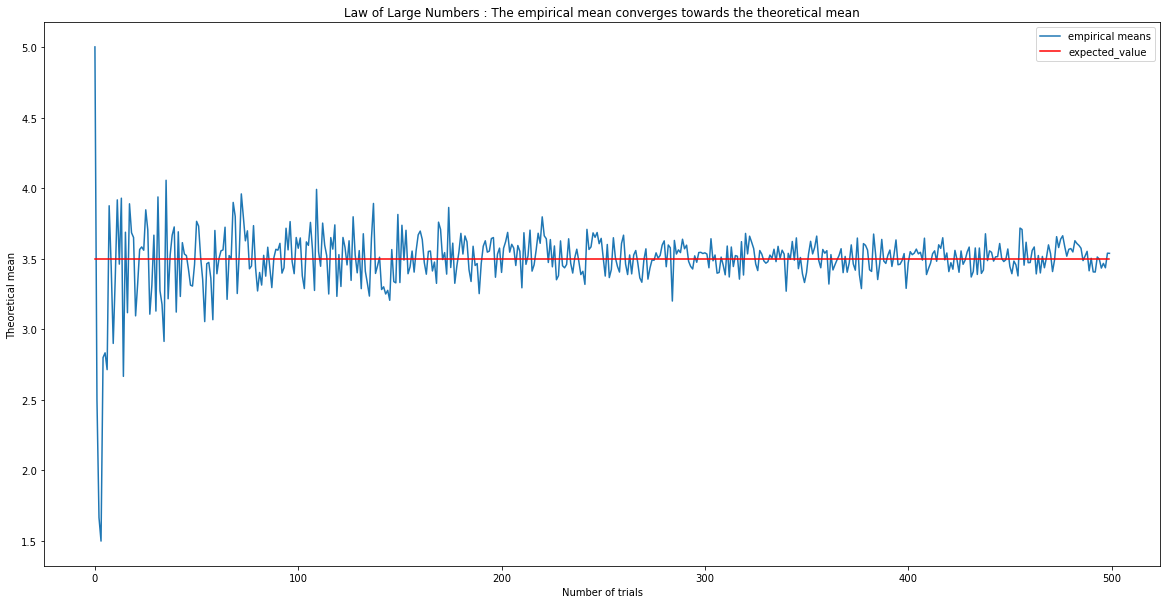

In [44]:
# YOUR CODE HERE
number_of_trials = 500 # play this this number
trials = np.arange(1,number_of_trials + 1,1)
results = [np.mean(np.random.randint(1,6+1, n)) for n in trials] 
plt.figure(figsize=(20,10))

plt.plot(results,label='empirical means')
plt.plot([expected_value]*len(results),label='expected_value', color = "red")

plt.title('Law of Large Numbers : The empirical mean converges towards the theoretical mean')
plt.xlabel('Number of trials')
plt.ylabel('Theoretical mean')

plt.legend(loc='best')
plt.show()

🎉 We can visually notice that the `empirical mean` $ \bar{X_n} = \frac{X_1 + X_2 + ... + X_{n-1} + X_n}{n}$ `converges towards the expected value` $ \mu = 3.5 $ as the *number of trials n increases* !

## 🪙 Tossing a coin 

### One time

👉 Let's run the same experiment with toss a coin instead.

* The outcomes are now 0 and 1.
* If you run the experiment 100 times, most likely you will have approximately 50 heads and 50 tails.
* Let's define "head" as a successful experiment and $p$ as the probability of having a head. Intuitively, $ p = \frac{1}{2} = 0.5 = 50 \%$

🤓 A random experiment with two possibles outcomes `success/failure`and $p$ as the `probability of success` is said to follow a **`Bernoulli distribution`** with parameter `p` $ \in [0,1] $

🔥 Let's verify the `Law of Large Numbers` for this `tossing a coin` experiment.

***Questions :***

👉 `Play with the number of trials in the cell below` and visualize the associated plot of average outcome vs. the number of trials.

In [21]:
number_of_trials = 500 # play this this number
p = 0.5 # expected value of the coin

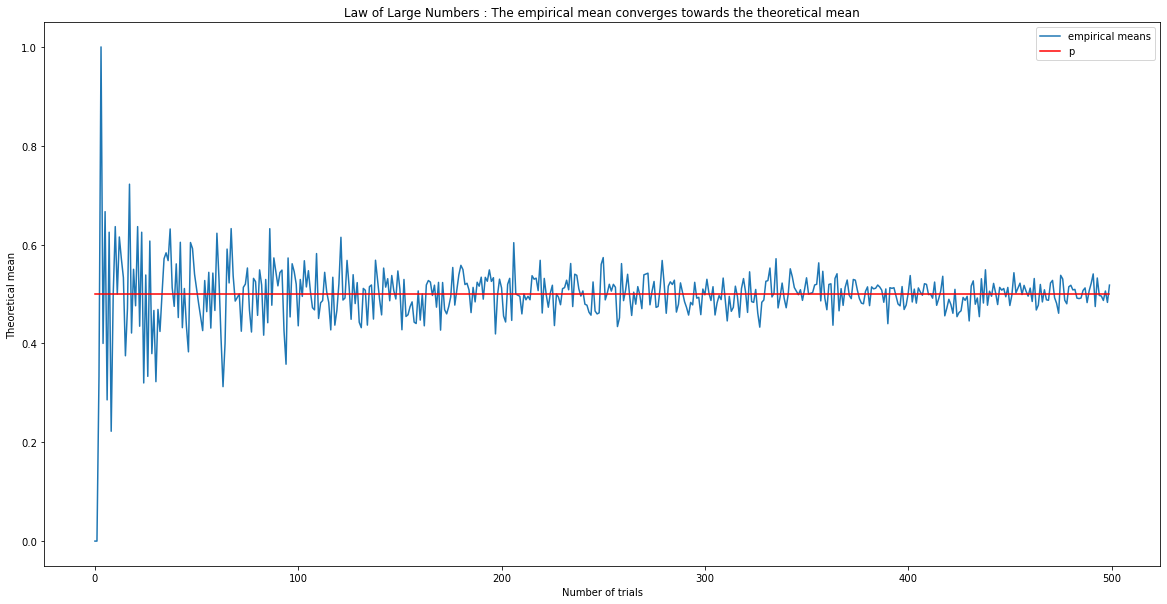

In [22]:
#############################################
#     playing with the number of trials     #
#############################################
trials = np.arange(1,number_of_trials + 1,1)
results = [np.mean(np.random.randint(0,1+1, n)) for n in trials]
    
#############################################
#            plotting the results           #
#############################################
        
plt.figure(figsize=(20,10))

plt.plot(results,label='empirical means')
plt.plot([p]*len(results),label='p', color = "red")

plt.title('Law of Large Numbers : The empirical mean converges towards the theoretical mean')
plt.xlabel('Number of trials')
plt.ylabel('Theoretical mean')

plt.legend(loc='best')
plt.show()

🎉 We can visually notice that the `empirical mean` $ \bar{X_n} = \frac{X_1 + X_2 + ... + X_{n-1} + X_n}{n}$ `converges towards the expected value` $ \mu = 0.5 $ as the *number of trials n increases* !

### Multiple times

👉 Here, ***ONE experiment*** consists of :
* tossing a coin `n_times`
* every trial has a `probability p` of success.

👉 After running one experiment, we can count the `number of successes` between `no success` and `n_times successes`.

📚 A random experiment with:
- two possible outcomes `success/failure`
- `p` $ \in [0,1] $ as the `probability of success`
- `n` $ \in \mathbb{N} $ trials

is said to follow a **`Binomial distribution (n,p)`** distribution.

😉 If you think about it, **`a Binomial distribution (n,p) is the sum of n independent Bernoulli(p) random variables`** !

---

❓ In the following cell, use [numpy.random.binomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html) to simulate **ONE Binomial Experience** in Python with:
- $p = 0.7$ (imagine that your coin is biased)
- $n = 10$ trials



In [43]:
# Run this cell multiple times 
# for one realisation of a Binomial Experience

n = 10  # tossing a coin n times
p = 0.7 # probability of success defined by p

# YOUR CODE HERE
np.random.binomial(n,p)

8

❓ Now, repeat this experiment $N = 20$ times and store the N results in a list

<details>
    <summary><i>Hint</i></summary>
    
Run the cell multiple times and observe the randomness...!
    
</details>

In [42]:
# Run this cell multiple times 
# for N realisations of a Binomial Experience

N = 20  # number of experiment
n = 10  # tossing a coin n times
p = 0.7 # probability of success defined by p

# YOUR CODE HERE
np.random.binomial(n,p,N)

array([ 7,  9,  8,  6,  5,  7, 10,  7,  5,  8,  8,  4,  8,  6,  8,  9,  9,
        7,  8,  9])

🔥 Let's verify the `Law of Large Numbers` for this `tossing a coin multiple times` experiment

***Questions:***

🤔 What average value did you expect ? Store into a `expected_value_coins` variable.

In [25]:
expected_value_coins = None

<details>
    <summary>Explanations</summary>

💡 For one Binomial Experience with $n = 10$ tosses and $p = 0.7$, you would expect $ n \times p = 10 \times 0.7 = 7$ successes.
    
📚 This result holds for any `Binomial(n,p)` random experiment!
    
$$ \mathbb{E}[X] = np $$
    
</details>

📈 Vizualize these results below

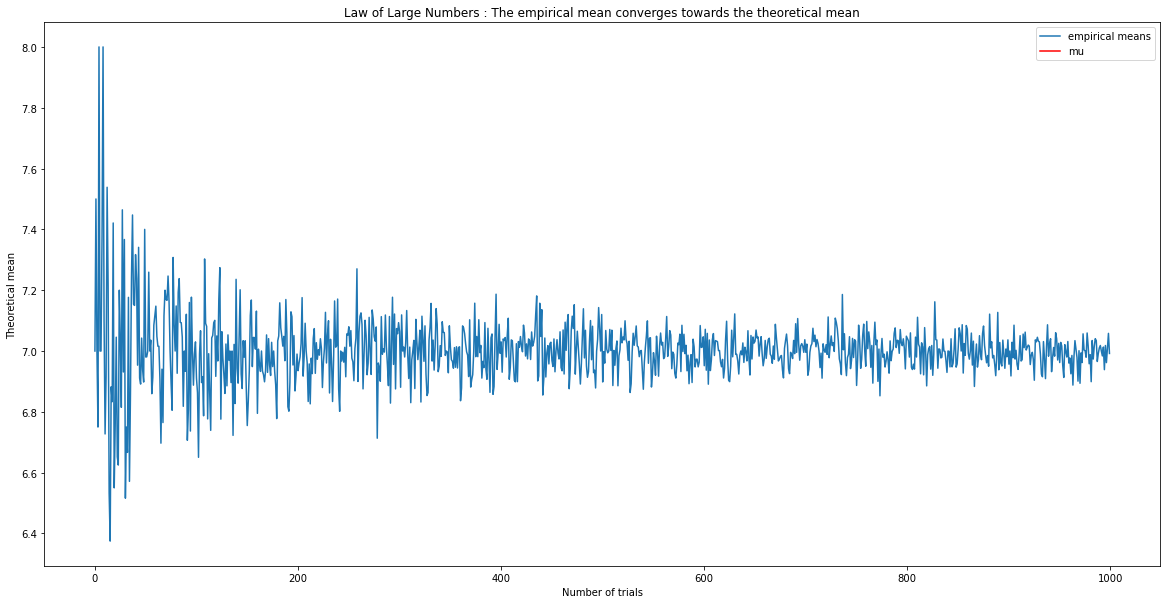

In [26]:
#############################################
#     playing with the number of trials     #
#############################################
p = 0.7
n = 10
N = 1000

trials = np.arange(1,N + 1,1)
results = [np.mean(np.random.binomial(n = n,p = p, size = N)) for N in trials]
    
#############################################
#            plotting the results           #
#############################################
    
    
plt.figure(figsize=(20,10))

plt.plot(results,label='empirical means')
plt.plot([expected_value_coins]*len(results),label='mu', color = "red")

plt.title('Law of Large Numbers : The empirical mean converges towards the theoretical mean')
plt.xlabel('Number of trials')
plt.ylabel('Theoretical mean')

plt.legend(loc='best')
plt.show()

🏁 Congratulations !!!

🔥 You've mastered one of the most fundamental theorems of `Probability Theory`, the `Law of Large Numbers`.

💾 Do not forget to commit your challenge !

---

***Additional ressources***

📺 [Law of Large Numbers - Explained and Visualized](https://www.youtube.com/watch?v=MntX3zWNWec) by Jeremy Blitz-Jones (4 min 11 sec)

🤓 Only for math nerds and completely overkill/unnecessary for data scientists:
- [ProbabilityCourse.com - LLN](https://www.probabilitycourse.com/chapter7/7_1_1_law_of_large_numbers.php)
- [Oxford University - LLN](http://www.stats.ox.ac.uk/~winkel/bs3a07l9-10.pdf)
